<div style="background-color: #f0f8ff; padding: 10px;">
    <font color="black" face="verdana" size="3"><b>Team Members </b></font>
    
   <font color="black" face="verdana" size="3">
       <br/>
Mansi Sharma (ms89743)
<br/>
Meghavi Singhaniya (ms89872)
<br/>
Milind Bhatia (mb67324)
<br/>
Meenakshi Sundaram (ms88544)
<br/>
Udit Dhand (Umd84)
    
  </font>
</div>

### Scraping Yelp reviews from top 10 restaurants for Austin, Chicago, Seattle, Miami, Los Angeles, New York

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:

link_list = []

cities = [('Austin','TX'),('New+York','NY'),('Miami','FL'),('Los+Angeles','CA'),('Minnesota','MN'),('Seattle','WA'),('Chicago','IL')]
metadata_df = pd.DataFrame(columns=['restaurant','city', 'link'])

for city, state in cities:
    link = f'https://www.yelp.com/search?find_desc=Pizza&find_loc={city}%2C+{state}&sortby=review_count'
    driver = webdriver.Chrome()
    wait = WebDriverWait(driver, 10)
    driver.get(link)

    li_elements = driver.find_elements(By.XPATH, '//*[@id="main-content"]/div/ul/li')

    # Loop through the list of li elements found and get the href attribute of each a element
    for i in range(len(li_elements)):
        try:
            xpath = f'//*[@id="main-content"]/div/ul/li[{i + 1}]/div[1]/div/div/div[2]/div[1]/div[1]/div[1]/div/div/h3/span/a'
            element = driver.find_element(By.XPATH, xpath)
            link = element.get_attribute('href')
        
            if 'Pizza' in link:
                link_list.append(link)
                name = element.text
                new_row = pd.Series({'restaurant': name, 'city': city, 'link': link})
                metadata_df = metadata_df.append(new_row, ignore_index=True)
                
        except Exception as e:
            pass

    driver.close()

In [ ]:
driver = webdriver.Chrome()
wait = WebDriverWait(driver, 10)


reviews_df = pd.DataFrame(columns=['restaurant','city','review'])


for _, row in metadata_df.iterrows():
    rest = row['restaurant']
    city = row['city']
    link = row['link']
    driver.get(link)

    while True:

        name_xp = '/html/body/yelp-react-root/div[1]/div[3]/div[1]/div[1]/div/div/div[1]/h1'
        #name_ele = driver.find_element(By.XPATH, name_xp).text
        name_ele = wait.until(EC.presence_of_element_located((By.XPATH, name_xp)))
        name = name_ele.text

        
        span_xp = '//*[@id="reviews"]//li//div//p/span'
        span_elements = driver.find_elements(By.XPATH, span_xp)
        #span_elements = wait.until(EC.presence_of_all_elements_located((By.XPATH, span_xp)))
        try:
            span_elements = wait.until(EC.presence_of_all_elements_located((By.XPATH, span_xp)))
        except Exception as e:
            print("No reviews found or the element didn't appear in time.")

        for i in range(len(span_elements)):
            try:
                xpath = f'//*[@id="reviews"]/section/div[2]/ul/li[{i + 1}]/div/div/p/span'
                xpath2 = f'//*[@id="reviews"]/section/div[2]/ul/li[{i + 1}]/div/div[4]/p/span'

                review_ele = driver.find_element(By.XPATH, xpath ).text
                new_row = pd.Series({'restaurant': name,'city':city , 'review': review_ele})
                reviews_df = reviews_df.append(new_row, ignore_index=True)

            except Exception as e:
                pass

        try:
            next_button = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="reviews"]/section/div[2]/div[5]/div[1]/div/div[11]/span/a/span')))
            next_button.click()
        except Exception as e:
            print("Last page reached.")
            break

reviews_df.to_csv('pizza_reviews.csv')

### Scraping Yelp Reviews - Austin Pizzas

In [ ]:
link_list = []
data = []
id = 1
links_df = pd.DataFrame(columns=['id', 'restaurant', 'link'])

link = f'https://www.yelp.com/search?find_desc=Pizza&find_loc=Austin%2C+TX&sortby=review_count'

driver = webdriver.Chrome()
wait = WebDriverWait(driver, 10)
driver.get(link)

while True:

    li_elements = driver.find_elements(By.XPATH, '//*[@id="main-content"]/div/ul/li')
    for i in range(len(li_elements)):
        try:
            xpath = f'//*[@id="main-content"]/div/ul/li[{i + 1}]/div[1]/div/div/div[2]/div[1]/div[1]/div[1]/div/div/h3/span/a'
     
            element = driver.find_element(By.XPATH, xpath)
            link = element.get_attribute('href')

            if 'Pizza' in link:                
                link_list.append(link)
                name = element.text
                data.append({'id': id, 'restaurant': name, 'link': link})
                id = id + 1
                
        except Exception as e:
            pass

    try:
        next_button = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="main-content"]/div/ul/li[21]/div/div[1]/div/div[11]/span/a/span')))
        next_button.click()            
    except Exception as e:
        print("Last page reached.")
        break



links_df = pd.DataFrame(data)
links_df = links_df[links_df['restaurant'] != '']


In [ ]:
driver = webdriver.Chrome()
wait = WebDriverWait(driver, 10)
data = []



reviews_df = pd.DataFrame(columns=['id','restaurant','review'])


for _, row in links_df.iterrows():
    rest = row['restaurant']
    link = row['link']
    id = row['id']
    driver.get(link)

    while True:

        name_xp = '/html/body/yelp-react-root/div[1]/div[3]/div[1]/div[1]/div/div/div[1]/h1'
        #name_ele = driver.find_element(By.XPATH, name_xp).text
        name_ele = wait.until(EC.presence_of_element_located((By.XPATH, name_xp)))
        name = name_ele.text

        
        span_xp = '//*[@id="reviews"]//li//div//p/span'
        span_elements = driver.find_elements(By.XPATH, span_xp)
        #span_elements = wait.until(EC.presence_of_all_elements_located((By.XPATH, span_xp)))
        try:
            span_elements = wait.until(EC.presence_of_all_elements_located((By.XPATH, span_xp)))
        except Exception as e:
            print("No reviews found or the element didn't appear in time.")

        for i in range(len(span_elements)):
            try:
                xpath = f'//*[@id="reviews"]/section/div[2]/ul/li[{i + 1}]/div/div/p/span'
                xpath2 = f'//*[@id="reviews"]/section/div[2]/ul/li[{i + 1}]/div/div[4]/p/span'

                review_ele = driver.find_element(By.XPATH, xpath ).text
                data.append({'id': id, 'restaurant': name, 'review': review_ele})


            except Exception as e:
                pass

        try:
            next_button = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="reviews"]/section/div[2]/div[5]/div[1]/div/div[11]/span/a/span')))
            next_button.click()
        except Exception as e:
            print("Last page reached.")
            break

        
reviews_df = pd.DataFrame(data)
reviews_df.to_csv('pizza_austin.csv')


### Data Loading

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import spacy



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/uditdhand/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/uditdhand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/uditdhand/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
compiled_df = pd.read_csv('pizza_reviews.csv')
compiled_df.groupby('city').count()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,restaurant,review
city,,,,,,
Austin,25332,25332,25332,12713,25332,25332
Chicago,37690,37690,37690,0,37690,37690
Los+Angeles,22147,22147,22147,0,22147,22147
Miami,7777,7777,7777,2473,7777,7777
Minnesota,209,209,209,0,209,209
New+York,55213,55213,55213,38488,55213,55213
Seattle,21322,21322,21322,0,21322,21322


In [140]:
compiled_df = compiled_df[compiled_df['city'] != 'Minnesota']
df = compiled_df.copy()

df_austin = df[df['city'] == 'Austin']
df_ny = df[df['city'] == 'New+York']
df_miam = df[df['city'] == 'Miami']
df_la = df[df['city'] == 'Los+Angeles']
df_st = df[df['city'] == 'Seattle']
df_ch = df[df['city'] == 'Chicago']

### Sampling

In [141]:
def sampling_fn(df_data):
    total_samples = 5000
    num_unique_rest = len(df_data['restaurant'].unique())
    samples_per_rest = total_samples // num_unique_rest

    sampled_df = pd.DataFrame()

    # Iterate through unique restaurants and sample the specified number of records
    for rest in df_data['restaurant'].unique():
        rest_records = df_data[df_data['restaurant'] == rest]
    
        num_to_sample = min(samples_per_rest, len(rest_records))
    
        if num_to_sample > 0:
            sampled_city_records = rest_records.sample(n=num_to_sample, random_state=42)  # Corrected sampling
            sampled_df = pd.concat([sampled_df, sampled_city_records])

    # If the total number of sampled records is less than 5000, you can fill the remaining
    # records by randomly sampling from the entire DataFrame
    remaining_samples = total_samples - len(sampled_df)
    if remaining_samples > 0:
        remaining_records = df_austin.sample(n=remaining_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, remaining_records])
    sampled_df.reset_index(drop=True, inplace=True)
    return sampled_df.iloc[:,4:]

In [142]:
df_austin = sampling_fn(df_austin)
df_ny = sampling_fn(df_ny)
df_miam = sampling_fn(df_miam)
df_la = sampling_fn(df_la)
df_st = sampling_fn(df_st)
df_ch = sampling_fn(df_ch)

### Exploratory Data Analysis - Austin Pizza Attributes

In [144]:
# Extract the comment column
comments = df_austin[df_austin['review'].apply(lambda x: isinstance(x, str))]['review']

# Get the NLTK English stop words
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the comments (remove punctuation, convert to lowercase, and remove stop words)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    nswords = [word for word in words if word not in stop_words]
    return list(set(nswords))

# Tokenize and preprocess the comments, removing stop words
words_nostop = []
for comment in comments:
    words = preprocesstext(comment)
    words_nostop.extend(words)

# Calculate word frequencies
words_nostop_freq = pd.Series(words_nostop).value_counts()

wnf_df = pd.DataFrame(words_nostop_freq)
wnf_df = wnf_df.reset_index()
wnf_df = wnf_df.rename(columns={'index': 'words', 0: 'frequency'})

In [145]:
wnf_df.head()

,words,count
0,pizza,3485
1,good,1874
2,place,1848
3,great,1840
4,food,1326


In [146]:
austin_att = ['cheese','pepperoni','garlic', 'meatball', 'sausage','thin','crispy']

#### Testing bigrams

In [147]:
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    nswords = [word for word in words if word not in stop_words]
    return " ".join(list(set(nswords)))

reviews = df_austin['review'].apply(preprocesstext)

In [148]:
tokens = nltk.word_tokenize(' '.join(reviews))

# Create bigrams from the tokens
bigrams = list(ngrams(tokens, 2))

In [149]:
# Count the frequency of each bigram
bigram_freq = Counter(bigrams)

# Convert the result to a DataFrame for better analysis if needed
bigram_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency'])

# Sort the DataFrame by frequency in descending order
bigram_df = bigram_df.sort_values(by='Frequency', ascending=False)


In [150]:
bigram_df.iloc[51:100,:]

,Bigram,Frequency
1365,"(could, get)",67
727,"(wait, go)",67
4890,"(sauce, delicious)",66
1035,"(try, food)",65
2435,"(eat, best)",65
927,"(place, two)",65
1765,"(recommend, food)",65
1459,"(best, also)",64
262,"(even, slice)",63
3896,"(us, outside)",62


### Calculating similarity scores using Cosine Similarity and Word Vectors

In [151]:
#Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#initialize the sentiment analyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/uditdhand/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [152]:
def bow_similarity(reviews, attributes):
    documents=reviews+[attributes]
    vectorizer=CountVectorizer(stop_words='english')
    sparse_matrix=vectorizer.fit_transform(documents)
    dtm_matrix=sparse_matrix.todense()
    df=pd.DataFrame(dtm_matrix,columns=vectorizer.get_feature_names_out(),index=list(range(len(documents))))
    return cosine_similarity(df,df)[:-1,-1]

def sentiment_scores(review):
    score = analyser.polarity_scores(review)['compound']
    return score

def preprocesstext(text):
    if isinstance(text, str):  # Check if 'text' is a string
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
        nswords = [word for word in words if word not in stop_words]
        return ' '.join(nswords)
    else:
        return ''

def calculate_similarity(nlp, attribute, review):
    attribute_doc = nlp(attribute)
    review_doc = nlp(review)
    return attribute_doc.similarity(review_doc)

def calc_similarity_city(df_city, att_ls):
    clean_df = df_city[df_city['review'].apply(lambda x: isinstance(x, str))].copy(deep=True)
    attr_str =" ".join(att_ls)
    bow_similarity_scores=bow_similarity(list(clean_df["review"]),attr_str)
    results_df=clean_df.copy()
    results_df["similarity_score"]=bow_similarity_scores

    analyser = SentimentIntensityAnalyzer()

    df_senti = df_city[df_city['review'].apply(lambda x: isinstance(x, str))].copy(deep=True)
    df_senti["sentiment_score"] = df_senti["review"].apply(sentiment_scores)
    results_df["sentiment_score"] = df_senti["sentiment_score"]
    results_df["eval_score"] = results_df["similarity_score"]*results_df["sentiment_score"]
    #results_df=results_df.groupby("restaurant").mean().sort_values(by='eval_score',ascending=False).reset_index()

    # First, determine which columns are numeric
    numeric_cols = results_df.select_dtypes(include=[np.number]).columns.tolist()

    # Now, group by 'restaurant' and calculate mean only on numeric columns
    results_df = results_df.groupby("restaurant")[numeric_cols].mean().sort_values(by='eval_score', ascending=False).reset_index()  

    stop_words = set(stopwords.words('english'))

    wv_df = df_city.copy()

    wv_df['review_processed'] = wv_df['review'].apply(preprocesstext)

    nlp = spacy.load("en_core_web_md")
    
    product_scores_ind = {}

    for product_name, group in wv_df.groupby("restaurant"):
        product_scores_ind[product_name] = {}
        scores_i = [calculate_similarity(nlp, attr_str, review) for review in group["review"]]
        avg_score_i = sum(scores_i) / len(scores_i)
        product_scores_ind[product_name] = avg_score_i
    
    df_wv_ind = pd.DataFrame(list(product_scores_ind.items()), columns=['restaurant', 'sim_score_wb'])

    results_df=pd.merge(results_df,df_wv_ind[['restaurant','sim_score_wb']],on="restaurant", how="inner")

    return results_df

In [153]:
austin_att = ['garlic', 'meatball', 'sausage','thin','crispy','good','staff']

### Austin attributes vs Austin

In [154]:
df_austin_sim = calc_similarity_city(df_austin,austin_att)
df_austin_sim

,restaurant,similarity_score,sentiment_score,eval_score,sim_score_wb
0,Patrizi's,0.075114,0.858345,0.067751,0.570813
1,Home Slice Pizza,0.056764,0.788709,0.046720,0.570348
2,Little Deli & Pizzeria,0.053481,0.820417,0.046300,0.568155
3,DeSano Pizzeria Napoletana,0.053636,0.788356,0.044463,0.568189
4,Pinthouse Pizza,0.051234,0.840225,0.044210,0.565599
5,Via 313 Pizza,0.049162,0.780368,0.040153,0.572111


In [157]:
df_austin_sim['similarity_score'].mean()

0.05656511868685793

In [158]:
aus = df_austin_sim['eval_score'].mean()
aus

0.048266124178252774

### Austin attributes vs NY

In [159]:
df_ny_sim = calc_similarity_city(df_ny,austin_att)
df_ny_sim

,restaurant,similarity_score,sentiment_score,eval_score,sim_score_wb
0,Rubirosa,0.052185,0.813227,0.045384,0.574695
1,Lombardi's Pizza,0.055250,0.685158,0.041739,0.565764
2,Roberta's,0.047744,0.713540,0.038107,0.554632
3,Bleecker Street Pizza,0.044254,0.743173,0.035357,0.557781
4,Juliana's,0.041280,0.811095,0.034059,0.558334
5,Grimaldi's Pizzeria,0.045023,0.653287,0.033532,0.549174
6,Prince Street Pizza,0.040816,0.727859,0.032499,0.573388
7,Joe's Pizza,0.042071,0.688685,0.031904,0.566647
8,Olio e Più,0.034420,0.866792,0.031248,0.546492
9,Di Fara Pizza,0.026101,0.659362,0.019916,0.552222


In [160]:
ny = df_ny_sim['eval_score'].mean()
ny

0.034374598895737726

### Austin attributes vs Seattle

In [161]:
df_st_sim = calc_similarity_city(df_st,austin_att)
df_st_sim

,restaurant,similarity_score,sentiment_score,eval_score,sim_score_wb
0,Pizza and Pasta Bar,0.063232,0.718888,0.050394,0.566970
1,Old Stove Brewing,0.057727,0.834053,0.050030,0.544027
2,Serious Pie Downtown,0.058178,0.768393,0.049108,0.581708
3,Alibi Room,0.050538,0.781572,0.043622,0.548066
4,Zeeks Pizza,0.055666,0.673731,0.042155,0.564245
5,Italian Family Pizza,0.051589,0.743031,0.041769,0.567821
6,Rocco's,0.053298,0.751093,0.041293,0.565761
7,Von's 1000 Spirits,0.045507,0.852571,0.039291,0.560221
8,Hot Mama's Pizza,0.050892,0.627043,0.036345,0.569206
9,The Pink Door,0.034633,0.840418,0.030550,0.545503


In [162]:
st = df_st_sim['eval_score'].mean()
st

0.04245565926662876

### Austin attributes vs Chicago

In [163]:
df_ch_sim = calc_similarity_city(df_ch,austin_att)
df_ch_sim

,restaurant,similarity_score,sentiment_score,eval_score,sim_score_wb
0,Little Deli & Pizzeria,0.117851,0.814500,0.095990,0.564192
1,Via 313 Pizza,0.102062,0.636900,0.065003,0.695524
2,Lou Malnati's Pizzeria,0.056322,0.748913,0.046049,0.574172
3,Piece Brewery and Pizzeria,0.055817,0.753896,0.044671,0.571569
4,Spacca Napoli,0.046094,0.806784,0.038961,0.569852
5,Pequod's Pizzeria,0.053085,0.655339,0.036638,0.572972
6,Gino's East - Magnificent Mile,0.047307,0.629554,0.033593,0.564025
7,Chicago Pizza And Oven Grinder Company,0.039620,0.778749,0.032641,0.574686
8,Giordano's,0.039631,0.653627,0.030596,0.569084


In [164]:
ch = df_ch_sim['eval_score'].mean()
ch

0.04712672075408202

### Austin Attributes vs LA

In [165]:
df_la_sim = calc_similarity_city(df_la,austin_att)
df_la_sim

,restaurant,similarity_score,sentiment_score,eval_score,sim_score_wb
0,Pizzeria Mozza,0.061382,0.810150,0.054223,0.574946
1,Little Deli & Pizzeria,0.058926,0.897250,0.047995,0.584901
2,Village Pizzeria,0.063499,0.646871,0.047652,0.564320
3,Masa of Echo Park,0.055020,0.766469,0.045899,0.582452
4,Apollonia's Pizzeria,0.051201,0.672432,0.040657,0.571550
5,Wood,0.049398,0.715461,0.040607,0.570295
6,DeSano Pizza Bakery,0.050798,0.759586,0.040548,0.569780
7,Braazo Pizza,0.047681,0.718940,0.037617,0.572318
8,L'Antica Pizzeria Da Michele,0.038903,0.826341,0.034226,0.553261
9,Via 313 Pizza,0.051031,0.518600,0.032502,0.638694


In [166]:
la = df_la_sim['eval_score'].mean()
la

0.037646580515011095

### Austin Attributes vs Miami

In [167]:
df_mi_sim = calc_similarity_city(df_miam,austin_att)
df_mi_sim

,restaurant,similarity_score,sentiment_score,eval_score,sim_score_wb
0,Patrizi's,0.087713,0.872489,0.080530,0.572092
1,The Big Cheese Of Miami,0.091634,0.771229,0.074736,0.577201
2,Home Slice Pizza,0.061279,0.807345,0.052508,0.566205
3,Little Deli & Pizzeria,0.057771,0.859965,0.051985,0.567748
4,Apizza Brooklyn Resto + Vino,0.058029,0.794075,0.047706,0.564962
5,Via 313 Pizza,0.052202,0.812676,0.045094,0.575850
6,CRUST,0.048053,0.869644,0.043575,0.561326
7,DeSano Pizzeria Napoletana,0.055429,0.723656,0.042702,0.568206
8,Pinthouse Pizza,0.050102,0.805354,0.041381,0.562544
9,Mister O1 Extraordinary Pizza - Wynwood,0.041598,0.801814,0.036419,0.566760


In [168]:
mi = df_mi_sim['eval_score'].mean()
mi

0.04820648578838969

### Visualizing how similar pizzas are between cities

In [169]:
cities = list(compiled_df['city'].unique())
cities = [item for item in cities]
vis_data = [aus,ny, mi, la, st, ch]

In [170]:
vis_data

[0.048266124178252774,
 0.034374598895737726,
 0.04820648578838969,
 0.037646580515011095,
 0.04245565926662876,
 0.04712672075408202]

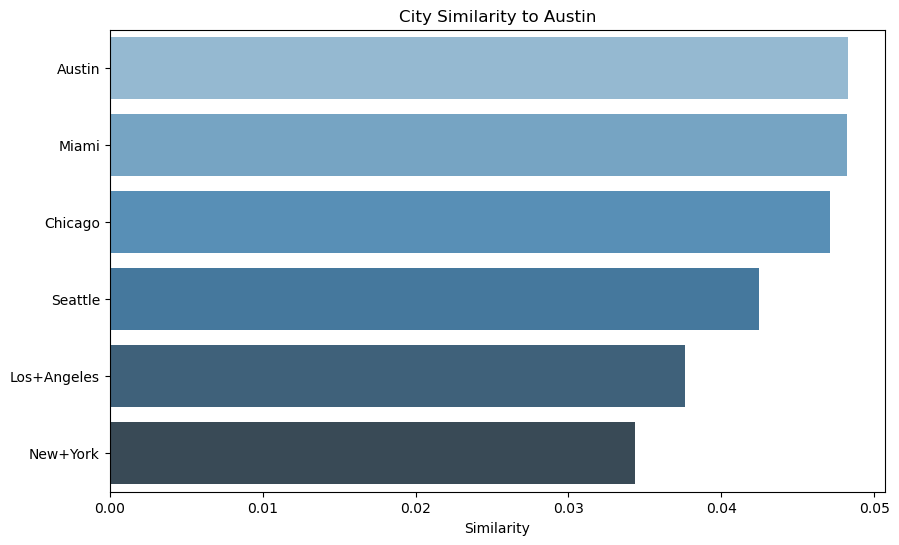

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=vis_data, y=cities, palette="Blues_d",order=sorted(cities, key=lambda x: vis_data[cities.index(x)], reverse=True))
plt.xlabel('Similarity')
plt.title('City Similarity to Austin')

# Display the plot
plt.show()

### Topic Modelling

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from bertopic import BERTopic
import io

In [3]:

# Update your list of stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = ['pizza', 'good', 'place', 'great', 'food', 'best', 'like', 'also','delicious', 'really', 'amazing','would','restaurant']
stop_words.update(additional_stopwords)

# Load the data
df_source = pd.read_csv('sampled_reviews.csv')

# Define the text cleaning function
def clean_text(headline):
    le = WordNetLemmatizer()
    word_tokens = word_tokenize(headline)
    tokens = [le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w) > 3]
    cleaned_text = " ".join(tokens)
    return cleaned_text

# List to store DataFrames for each city
dfs_topics = []

for city in df_source['city'].unique():
    df_tmp = df_source[df_source['city'] == city]
    df_tmp['cleaned_text'] = df_tmp['review'].apply(clean_text)

    vect = TfidfVectorizer(stop_words=list(stop_words), max_features=1000)
    vect_text = vect.fit_transform(df_tmp['cleaned_text'])

    df = df_tmp['cleaned_text']
    model = BERTopic(nr_topics=10)
    docs = df.to_list()
    topics, probabilities = model.fit_transform(docs)

    # Save topics and their words to a DataFrame and append to the list
    topic_words = model.get_topic_info()
    topic_words['city'] = city  # Add a column to identify the city
    dfs_topics.append(topic_words)

    # Visualize the barchart
    fig = model.visualize_barchart()
    fig.write_html(f"{city}_barchart.html")


# Combine all DataFrames into one
df_all_topics = pd.concat(dfs_topics, ignore_index=True)


### Word Cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/uditdhand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/uditdhand/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/uditdhand/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


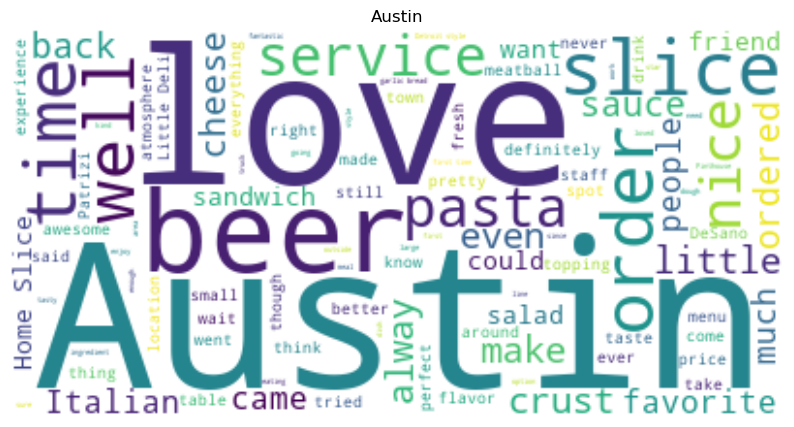

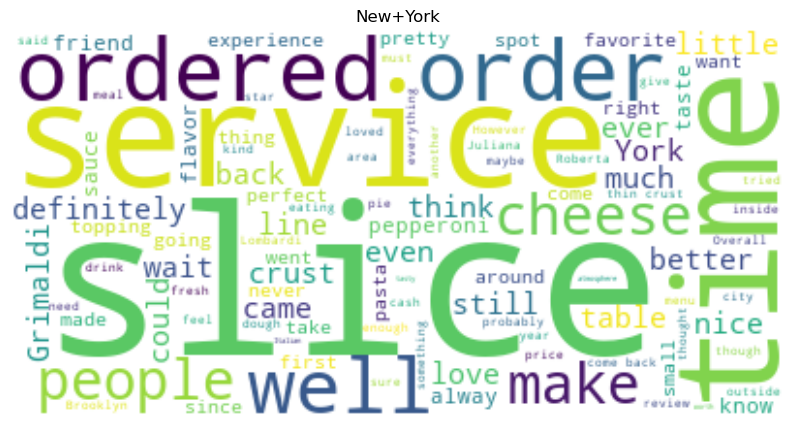

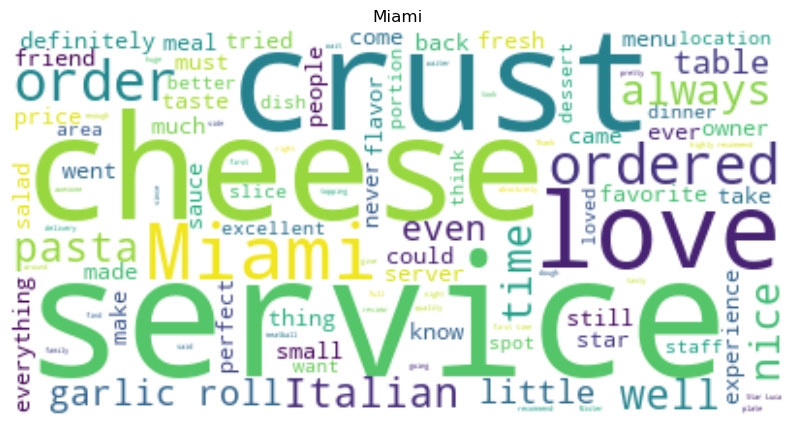

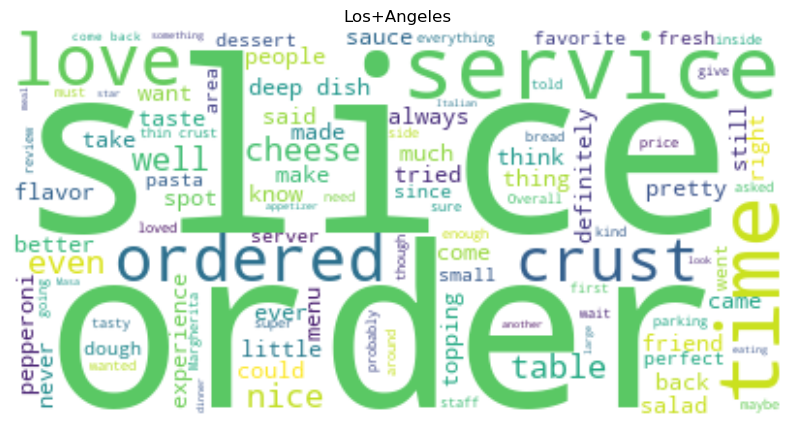

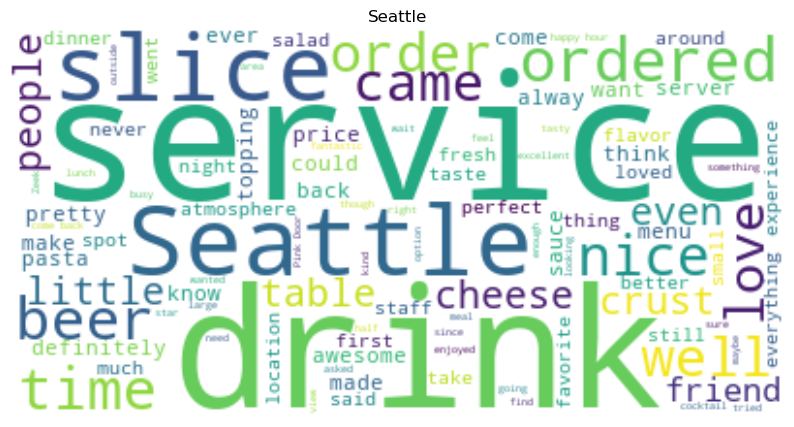

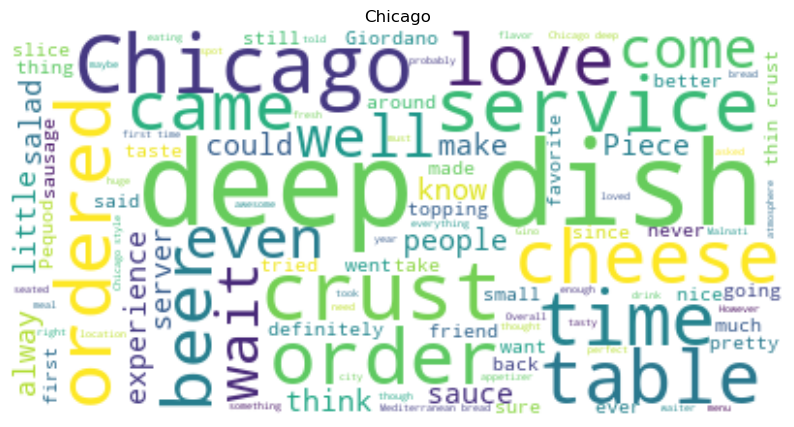

In [4]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Load your data
df_source = pd.read_csv('sampled_reviews.csv')

# Update your list of stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = ['pizza', 'good', 'place', 'great', 'food', 'best', 'like', 'also','delicious', 'really', 'amazing','would','restaurant']
stop_words.update(additional_stopwords)

# Define the text cleaning function
def clean_text(text):
    le = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    tokens = [le.lemmatize(w) for w in word_tokens if w.lower() not in stop_words and len(w) > 3]
    cleaned_text = " ".join(tokens)
    return cleaned_text

# Ensure necessary data is downloaded for nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Create a Word Cloud for each city
for city in df_source['city'].unique():
    df_city = df_source[df_source['city'] == city]
    
    # Apply Cleaning
    df_city['cleaned_text'] = df_city['review'].apply(clean_text)
    
    # Combine all reviews of the city into one large text
    text = " ".join(review for review in df_city['cleaned_text'])

    # Create and generate a word cloud image
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(text)

    # Display the generated image:
    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(city)
    plt.show()


### Long Tail


In [172]:
import pandas as pd
df_reviews=pd.read_csv("pizza_austin.csv")

df_reviews.drop(["Unnamed: 0","id"],inplace=True,axis=1)
df_reviews.head()

,restaurant,review
0,Home Slice Pizza,Somehow I lived in Austin for 22 years before ...
1,Home Slice Pizza,Always the go to for a slice in Austin. Super ...
2,Home Slice Pizza,We went on a Sunday night around 9:30pm during...
3,Home Slice Pizza,Came in here this past Saturday afternoon arou...
4,Home Slice Pizza,Without a side by side comparison available I ...


In [173]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (you only need to do this once)
nltk.download('stopwords')

# Extract the comment column
comments = df_reviews[df_reviews['review'].apply(lambda x: isinstance(x, str))]['review']

# Get the NLTK English stop words
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the comments (remove punctuation, convert to lowercase, and remove stop words)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    nswords = [word for word in words if word not in stop_words]
    return list(set(nswords))

# Tokenize and preprocess the comments, removing stop words
words_nostop = []
for comment in comments:
    words = preprocesstext(comment)
    words_nostop.extend(words)

# Calculate word frequencies
words_nostop_freq = pd.Series(words_nostop).value_counts()

wnf_df = pd.DataFrame(words_nostop_freq)
wnf_df = wnf_df.reset_index()
wnf_df = wnf_df.rename(columns={'index': 'words', 0: 'frequency'})

wnf_df.to_csv('review_words.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/uditdhand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [174]:
preferred_df=pd.read_csv("Pizza Preferences.csv")
preferred_df

,words,frequency
0,service,10826
1,crust,6593
2,cheese,5969
3,sauce,5190
4,fresh,4599
5,beer,4316
6,atmosphere,3549
7,drinks,3287
8,pepperoni,3041
9,chicken,2929


In [175]:
selected_attributes =["ambiance","spicy","flavorful","unique"]

In [177]:
df1=df_reviews.copy()

df1["cleaned_review_wo_stopwords"] = df1["review"].astype(str).apply(lambda review: preprocesstext(review))
df1.head()

,restaurant,review,cleaned_review_wo_stopwords
0,Home Slice Pizza,Somehow I lived in Austin for 22 years before ...,"[lovely, red, next, crispy, dreaming, sandwich..."
1,Home Slice Pizza,Always the go to for a slice in Austin. Super ...,"[come, beverages, looks, say, goes, crispy, ma..."
2,Home Slice Pizza,We went on a Sunday night around 9:30pm during...,"[16, dough, pizza, table, towards, went, tomat..."
3,Home Slice Pizza,Came in here this past Saturday afternoon arou...,"[afterthought, find, pizza, constant, area, de..."
4,Home Slice Pizza,Without a side by side comparison available I ...,"[recommendation, might, 2, pizza, people, went..."


In [178]:
Reviews_Count = df1.groupby("restaurant")["review"].count().sort_values(ascending=False)


In [180]:
rank_df=pd.DataFrame({"restaurant":Reviews_Count.index.values.tolist(),
                      "count_of_reviews":Reviews_Count.values.tolist(),
                      "Rank":Reviews_Count.rank(ascending=False, method='min').astype("int").values.tolist()})
rank_df

,restaurant,count_of_reviews,Rank
0,Home Slice Pizza,5362,1
1,Via 313 Pizza,3677,2
2,Salty Sow,3222,3
3,Pinthouse Pizza,2163,4
4,Little Deli & Pizzeria,1525,5
...,...,...,...
107,Roppolo’s Pizzeria West Campus,10,90
108,Boss Pizza,10,90
109,Possum Pizza,10,90
110,Pizza Hut,10,90


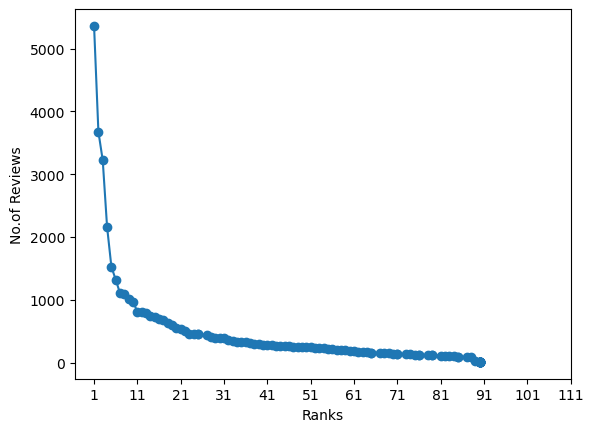

In [181]:
plt.plot(rank_df["Rank"],rank_df["count_of_reviews"],marker="o")
plt.xticks(range(1,len(rank_df["Rank"]),10))
plt.xlabel("Ranks")
plt.ylabel("No.of Reviews")
plt.show()

In [182]:
def lift(n, x, y, xy):
    return ((n*xy)/(x*y))

In [187]:
df1[["restaurant", "review", "cleaned_review_wo_stopwords"]]

,restaurant,review,cleaned_review_wo_stopwords
0,Home Slice Pizza,Somehow I lived in Austin for 22 years before ...,"[lovely, red, next, crispy, dreaming, sandwich..."
1,Home Slice Pizza,Always the go to for a slice in Austin. Super ...,"[come, beverages, looks, say, goes, crispy, ma..."
2,Home Slice Pizza,We went on a Sunday night around 9:30pm during...,"[16, dough, pizza, table, towards, went, tomat..."
3,Home Slice Pizza,Came in here this past Saturday afternoon arou...,"[afterthought, find, pizza, constant, area, de..."
4,Home Slice Pizza,Without a side by side comparison available I ...,"[recommendation, might, 2, pizza, people, went..."
...,...,...,...
44839,Bat City Pies,Delicious pizza! High quality ingredients and ...,"[high, ingredients, blend, delicious, cooked, ..."
44840,Bat City Pies,Is it Detroit style? Is it Chicago? I'm not su...,"[owners, super, get, 2, reasonably, pizza, eas..."
44841,Bat City Pies,Delicious! 10/10 recommend. Way better than Vi...,"[1010, right, crispy, delicious, way, 313, sof..."
44842,Bat City Pies,Pizza truck inside The Buzz Mill; We ordered t...,"[crispy, sandwich, friendly, pizza, special, c..."


In [190]:
#lift_df=df1[["restaurant","review","cleaned_review_wo_stopwords"]].apply(pd.Series.explode).drop_duplicates().copy(deep=True)

# Explode each column individually and reset the index each time
restaurant_exploded = df1['restaurant'].explode().reset_index()
review_exploded = df1['review'].explode().reset_index()
cleaned_review_exploded = df1['cleaned_review_wo_stopwords'].explode().reset_index()

# Merge the exploded columns back into a single DataFrame using the common index
lift_df = pd.merge(pd.merge(restaurant_exploded, review_exploded, on='index'), cleaned_review_exploded, on='index')

# Drop the 'index' column used for merging
lift_df.drop('index', axis=1, inplace=True)

# Remove duplicates
lift_df.drop_duplicates(inplace=True)

# If you still need a deep copy
lift_df = lift_df.copy(deep=True)

lift_df

,restaurant,review,cleaned_review_wo_stopwords
0,Home Slice Pizza,Somehow I lived in Austin for 22 years before ...,lovely
1,Home Slice Pizza,Somehow I lived in Austin for 22 years before ...,red
2,Home Slice Pizza,Somehow I lived in Austin for 22 years before ...,next
3,Home Slice Pizza,Somehow I lived in Austin for 22 years before ...,crispy
4,Home Slice Pizza,Somehow I lived in Austin for 22 years before ...,dreaming
...,...,...,...
1877397,Bat City Pies,"Great pies, cool staff, and a big patio space ...",space
1877398,Bat City Pies,"Great pies, cool staff, and a big patio space ...",great
1877399,Bat City Pies,"Great pies, cool staff, and a big patio space ...",note
1877400,Bat City Pies,"Great pies, cool staff, and a big patio space ...",try


In [191]:
#lift_chart=pd.DataFrame(columns=["restaurant","attribute","lift_value"])

unique_resturants=lift_df["restaurant"].drop_duplicates().values.tolist()

lift_values=[]

for restaurant in unique_resturants:
    for attr in selected_attributes:
        n=df1["review"].count()
        x=df1[df1["restaurant"]==restaurant]["review"].count()
        y=lift_df["cleaned_review_wo_stopwords"].value_counts()[attr]
        xy=lift_df[(lift_df["restaurant"]==restaurant) & (lift_df["cleaned_review_wo_stopwords"]==attr)]["review"].count()
        lift_val=lift(n,x,y,xy)
        lift_dict={}
        lift_dict["restaurant"]=restaurant
        lift_dict["attribute"]=attr
        lift_dict["lift_value"]=lift_val
        lift_values.append(lift_dict)
lift_chart=pd.DataFrame(lift_values)

In [192]:
summary_table=pd.crosstab(lift_chart["restaurant"],lift_chart["attribute"],lift_chart["lift_value"],aggfunc=np.mean)
summary_table

attribute,ambiance,flavorful,spicy,unique
restaurant,,,,
ARTIPASTA,0.364987,2.254898,0.174916,0.622792
Austin Beer Garden Brewing Company,0.928770,0.870940,0.953789,1.245198
Austin's Pizza Braker,0.330065,0.382341,0.474540,0.000000
Austin's Pizza Four Points,0.000000,0.425699,0.000000,0.000000
Austin's Pizza Southpark Meadows,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
Wanderlust Wine - Shady Lane,3.564706,0.000000,0.000000,4.561953
Woody's Pizza,0.000000,0.550571,0.683337,0.000000
Yaghi's New York Pizzeria,0.197673,0.457961,0.663128,0.084324


In [193]:
filtered_df=summary_table[(summary_table>1).all(axis=1)]
filtered_df


attribute,ambiance,flavorful,spicy,unique
restaurant,,,,
Baldinucci Pizza Romana,2.921890,1.353863,2.520506,1.495722
FoodHeads,1.068287,1.563135,4.365166,2.734294
Olive & June,3.544160,1.606493,1.181563,1.511887
Patrizi's,2.795203,2.285580,1.702039,2.104222
REVUE,2.564537,1.782424,1.843535,1.969188
The Backspace,2.185446,1.462688,1.186996,1.367343


In [194]:
merged_df = pd.merge(filtered_df, rank_df, on="restaurant").set_index("restaurant")
merged_df

,ambiance,flavorful,spicy,unique,count_of_reviews,Rank
restaurant,,,,,,
Baldinucci Pizza Romana,2.921890,1.353863,2.520506,1.495722,122,76
FoodHeads,1.068287,1.563135,4.365166,2.734294,634,18
Olive & June,3.544160,1.606493,1.181563,1.511887,694,16
Patrizi's,2.795203,2.285580,1.702039,2.104222,1084,8
REVUE,2.564537,1.782424,1.843535,1.969188,139,70
The Backspace,2.185446,1.462688,1.186996,1.367343,734,14


In [195]:
merged_df.index

Index(['Baldinucci Pizza Romana', 'FoodHeads', 'Olive & June', 'Patrizi's',
       'REVUE', 'The Backspace'],
      dtype='object', name='restaurant')

In [196]:
top7_list=rank_df["restaurant"][:7].values.tolist()
top7_df=summary_table.loc[top7_list,:]
top7_df

attribute,ambiance,flavorful,spicy,unique
restaurant,,,,
Home Slice Pizza,0.525199,0.785503,0.258067,0.536000
Via 313 Pizza,0.416868,0.853482,0.599337,1.215859
Salty Sow,2.013583,1.614803,0.588535,2.166291
Pinthouse Pizza,0.461451,0.534535,0.876681,1.265452
Little Deli & Pizzeria,0.444127,0.595700,0.672135,0.358973
DeSano Pizzeria Napoletana,0.675646,1.158328,1.087951,0.691729
Eureka! - Austin,1.520337,0.974241,2.418344,1.076323


In [197]:
top7_df_inc_rank=pd.merge(top7_df,rank_df,on="restaurant").set_index("restaurant")
top7_df_inc_rank

,ambiance,flavorful,spicy,unique,count_of_reviews,Rank
restaurant,,,,,,
Home Slice Pizza,0.525199,0.785503,0.258067,0.536000,5362,1
Via 313 Pizza,0.416868,0.853482,0.599337,1.215859,3677,2
Salty Sow,2.013583,1.614803,0.588535,2.166291,3222,3
Pinthouse Pizza,0.461451,0.534535,0.876681,1.265452,2163,4
Little Deli & Pizzeria,0.444127,0.595700,0.672135,0.358973,1525,5
DeSano Pizzeria Napoletana,0.675646,1.158328,1.087951,0.691729,1319,6
Eureka! - Austin,1.520337,0.974241,2.418344,1.076323,1102,7


In [198]:
#word2vec
!pip install spacy
!python -m spacy download en_core_web_md
import spacy
nlp = spacy.load("en_core_web_md")
def calculate_similarity(nlp, attribute, review):
    attribute_doc = nlp(attribute)
    review_doc = nlp(review)
    return attribute_doc.similarity(review_doc)



att_str = " ".join(selected_attributes)
att_str

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 29.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


'ambiance spicy flavorful unique'

In [199]:
product_scores_ind = {}

for product_name, group in df1.groupby("restaurant"):
    product_scores_ind[product_name] = {}
    scores_i = [calculate_similarity(nlp,att_str, review) for review in group["review"]]
    avg_score_i = sum(scores_i) / len(scores_i)
    product_scores_ind[product_name] = avg_score_i

df_wv_ind = pd.DataFrame(list(product_scores_ind.items()), columns=['restaurant', 'sim_score_wb'])
df_wv_ind.sort_values(by='sim_score_wb',ascending=False)

,restaurant,sim_score_wb
13,Bat City Pies,0.480734
30,Fast Friends Beer,0.475960
88,South Flo Pizza In H-E-B,0.474803
32,FoodHeads,0.474433
11,Baldinucci Pizza Romana,0.473515
...,...,...
45,Little Woodrow's Burnet,0.414377
57,Mr Gatti's Pizza Riverside,0.407474
66,Papa Johns Pizza,0.401194
26,Domino's Pizza,0.388110


**Recommendations from Word2Vec**

In [200]:
word_vec_df=df_wv_ind.sort_values(by='sim_score_wb',ascending=False)[:5]
wv_merged_rank=pd.merge(word_vec_df,rank_df,on="restaurant").set_index("restaurant")
wv_merged_rank

,sim_score_wb,count_of_reviews,Rank
restaurant,,,
Bat City Pies,0.480734,10,90
Fast Friends Beer,0.475960,10,90
South Flo Pizza In H-E-B,0.474803,10,90
FoodHeads,0.474433,634,18
Baldinucci Pizza Romana,0.473515,122,76


**Recommendations from Lift**

In [201]:
merged_df

,ambiance,flavorful,spicy,unique,count_of_reviews,Rank
restaurant,,,,,,
Baldinucci Pizza Romana,2.921890,1.353863,2.520506,1.495722,122,76
FoodHeads,1.068287,1.563135,4.365166,2.734294,634,18
Olive & June,3.544160,1.606493,1.181563,1.511887,694,16
Patrizi's,2.795203,2.285580,1.702039,2.104222,1084,8
REVUE,2.564537,1.782424,1.843535,1.969188,139,70
The Backspace,2.185446,1.462688,1.186996,1.367343,734,14


In [202]:
# List of restaurant names to filter
restaurant_names = [
    'Home Slice Pizza',
    'Via 313 Pizza',
    'Salty Sow',
    'Pinthouse Pizza',
    'Little Deli & Pizzeria',
    'DeSano Pizzeria Napoletana',
    'Eureka! - Austin'
]

# Filter df1 based on the specified restaurant names and select the "reviews" column
filtered_df1 = df1[df1['restaurant'].isin(restaurant_names)][["cleaned_review_wo_stopwords"]]

In [203]:
# Define a custom function to join a list of words into a sentence
def list_to_sentence(word_list):
    return ' '.join(word_list)

# Apply the custom function to each cell in the 'words_list' column
filtered_df1['cleaned_review'] = filtered_df1["cleaned_review_wo_stopwords"].apply(list_to_sentence)

In [204]:
model = BERTopic(verbose=True)

#convert to list
docs = filtered_df1['cleaned_review'].tolist()
topics, probabilities = model.fit_transform(docs)
model.get_topic_freq()

Downloading: 100%|██████████| 1.18k/1.18k [00:00<00:00, 300kB/s]
Downloading: 100%|██████████| 190/190 [00:00<00:00, 71.1kB/s]
Downloading: 100%|██████████| 10.6k/10.6k [00:00<00:00, 1.73MB/s]
Downloading: 100%|██████████| 116/116 [00:00<00:00, 23.7kB/s]
Downloading: 100%|██████████| 39.3k/39.3k [00:00<00:00, 1.43MB/s]
Downloading: 100%|██████████| 90.9M/90.9M [00:02<00:00, 38.1MB/s]
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 36.1kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 22.7kB/s]
Downloading: 100%|██████████| 466k/466k [00:00<00:00, 3.96MB/s]
Downloading: 100%|██████████| 350/350 [00:00<00:00, 234kB/s]
Downloading: 100%|██████████| 13.2k/13.2k [00:00<00:00, 6.87MB/s]
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 2.84MB/s]
Batches: 100%|██████████| 575/575 [02:44<00:00,  3.48it/s]
2023-10-12 02:25:23,837 - BERTopic - Transformed documents to Embeddings
2023-10-12 02:25:43,178 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-10-12 02:25:45,482 - BERTopic - Clustered reduced embeddings


,Topic,Count
0,0,18085
1,1,285


#### Popular Restaurants Topic Modelling
![Alt text](<Popular Restaurants_Topic Modelling.jpeg>) 

In [206]:
# List of restaurant names to filter
restaurant_names = ['Austin Beer Garden Brewing Company', 'Baldinucci Pizza Romana',
       'Bufalina Due', 'Cipollina', 'Corner', 'Cucina On 35th',
       'DeSano Pizzeria Napoletana', 'Delucca Gaucho Pizza & Wine Austin',
       'Eureka! - Austin', 'FoodHeads', 'Intero Restaurant',
       "Nik's Italian Kitchen + Bar", "North Italia", 'Nosh & Bevvy',
       'Olive & June', "Patrizi's", "Pinthouse Brewing", 'REVUE', 'Salty Sow',
       'Siena Ristorante Toscana', 'Sour Duck Market', 'The Backspace','The Carillon']

# Filter df1 based on the specified restaurant names and select the "reviews" column
filtered_df2 = df1[df1['restaurant'].isin(restaurant_names)][["cleaned_review_wo_stopwords"]]

In [207]:
# Define a custom function to join a list of words into a sentence
def list_to_sentence(word_list):
    return ' '.join(word_list)

# Apply the custom function to each cell in the 'words_list' column
filtered_df2['cleaned_review'] = filtered_df2["cleaned_review_wo_stopwords"].apply(list_to_sentence)

In [208]:
filtered_df3=df1[df1['restaurant'].isin(restaurant_names)][["review"]]
filtered_df3

,review
8300,I am not sure why more people aren't talking a...
8301,"The pizza was delicious. Authentic, woodfired,..."
8302,"After just one bite, I'm instantly transported..."
8303,Incredible pie. Watch out. If you purchase a s...
8304,Food: 5/5\nAmbiance: 4/5\n\nOne of the best pi...
...,...
43054,After meeting the owner recently I was encoura...
43055,I love their fish torta. It is light and delic...
43056,foodheads is so super cute! and they have grea...
43057,awesome sandwiches. we had the beef and brie a...


In [209]:
model1 = BERTopic(nr_topics=10,verbose=True)

#convert to list
docs = filtered_df2['cleaned_review'].tolist()
topics, probabilities = model1.fit_transform(docs)
model1.get_topic_freq()

Batches: 100%|██████████| 444/444 [02:52<00:00,  2.58it/s]
2023-10-12 02:28:40,255 - BERTopic - Transformed documents to Embeddings
2023-10-12 02:28:49,529 - BERTopic - Reduced dimensionality
2023-10-12 02:28:50,309 - BERTopic - Clustered reduced embeddings
2023-10-12 02:28:51,825 - BERTopic - Reduced number of topics from 105 to 10


,Topic,Count
0,-1,8476
2,0,3605
3,1,1038
1,2,959
9,3,35
4,4,30
7,5,18
8,6,12
5,7,11
6,8,10


#### Tail Restaurants Topic Modelling
![Alt text](<Tail Restaurants_Topic Modelling.jpeg>)